# Задачи
1. Загрузите датасет `transaction_data.csv`. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.
2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота. Подумайте, как можно улучшить график.
3. Сколько транзакций завершились ошибкой?
4. Сколько успешных транзакций осуществил каждый из пользователей? Постройте гистограмму распределения числа успешных транзакций.
5. Коллега прислал Вам обновленные данные. Постройте сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполните нулями.
6. Изучите представленный график. Помогите коллеге разобраться,  есть ли в данных ошибка, или же всё хорошо.
7. Если в данные закралась ошибка, исправьте её и сохраните правильное число минут, прошедших с начала дня, в колонку true_minute.

# Описание данных

Имеются следующие данные:

* date – дата (2020-03-02 00:00:00 – 2020-03-02 01:29:05)
* name – имя пользователя
* transaction – статус транзакции
* minute* – сколько минут прошло с начала дня

*Доступна в данных с 5 шага.

**1. Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.**

**Вопрос**: сколько в датасете пропущенных значений?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('data/transaction_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5315 entries, 0 to 5314
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         5315 non-null   object
 1   name         5315 non-null   object
 2   transaction  5315 non-null   object
dtypes: object(3)
memory usage: 124.7+ KB


In [12]:
df.dtypes

date           object
name           object
transaction    object
dtype: object

In [13]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [14]:
df.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:33:10,Masha_Ozerova,successfull
freq,6,112,3692


In [15]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

Ответ: `пропущенных значений 0.`

**2. Проверьте, какие значения принимает колонка transaction . Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.**

**Вопрос:** расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [16]:
df.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [25]:
transtatus=df.transaction.value_counts(ascending=False)
transtatus

transaction
successfull    3692
cancelled      1619
error             4
Name: count, dtype: int64

[Text(0, 0, '3692'), Text(0, 0, '1619'), Text(0, 0, '4')]

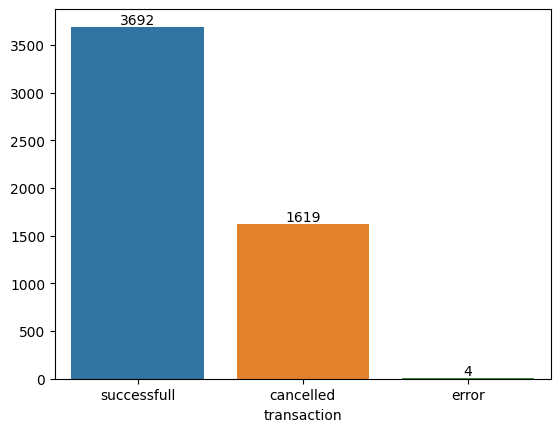

In [32]:
ax = sns.barplot(x=transtatus.index, y=transtatus.values)

ax.bar_label(ax.containers[0])

**1. successfull**

**2. cancelled**

**3. error**

**3. Подумайте, хорош ли полученный график?**

* Да, это просто график мечты!
* **Плохо видно число наблюдений у некоторых значений**
* У графика неправильно подписаны оси
* На барплоте не может быть квалитативных переменных

**Улучшим график:**

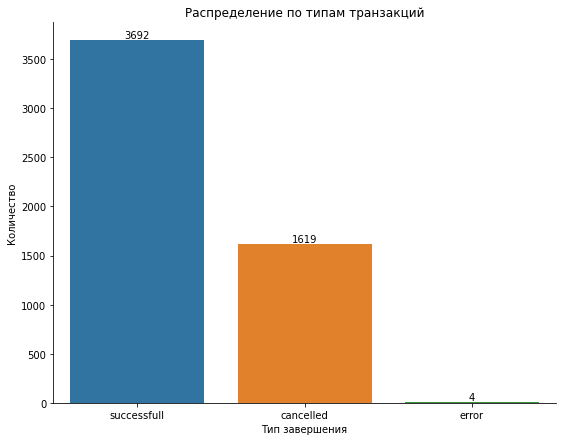

In [14]:
fig, ax = plt.subplots(figsize=(9,7))
sns.barplot(x=transtatus.index, y=transtatus.values, ax=ax)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип завершения')
ax.set_title('Распределение по типам транзакций')
ax.bar_label(ax.containers[0])
sns.despine()

**4. Сколько произошло ошибок?**

In [34]:
transtatus['error']

4

Ответ: `4`

**5. Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull**

**Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где**

* по оси x – число транзакций
* по оси y – доля пользователей с таким числом транзакций

Выберите верные утверждения.

* **Пользователи в среднем совершили примерно по 66 транзакций**
* **Максимальное число транзакций – 82**
* Пользователи в среднем совершили по 64 транзакции
* **Примерно 25% пользователей совершили менее 61 транзакции**
* Примерно 25% пользователей совершили более 61 транзакции
* Пользователи в среднем совершили примерно по 56 транзакций
* Максимальное число транзакций – 112
* Пользователи в среднем совершили примерно по 94 транзакции

In [51]:
ustrans = df.query('transaction=="successfull"').groupby('name').size()
ustrans

name
Ekaterina_Fedorova     72
Ekaterina_Ivanova      59
Ekaterina_Lesnova      63
Ekaterina_Ozerova      72
Ekaterina_Petrova      68
Ekaterina_Polyanova    68
Ekaterina_Smirnova     77
Irina_Fedorova         62
Irina_Ivanova          60
Irina_Lesnova          76
Irina_Ozerova          76
Irina_Petrova          66
Irina_Polyanova        59
Irina_Smirnova         63
Julia_Fedorova         67
Julia_Ivanova          63
Julia_Lesnova          55
Julia_Ozerova          60
Julia_Petrova          74
Julia_Polyanova        61
Julia_Smirnova         67
Lolita_Fedorova        70
Lolita_Ivanova         76
Lolita_Lesnova         52
Lolita_Ozerova         63
Lolita_Petrova         64
Lolita_Polyanova       59
Lolita_Smirnova        65
Masha_Fedorova         69
Masha_Ivanova          73
Masha_Lesnova          63
Masha_Ozerova          80
Masha_Petrova          62
Masha_Polyanova        78
Masha_Smirnova         57
Olga_Fedorova          72
Olga_Ivanova           64
Olga_Lesnova           56
Olga_Oz

In [52]:
ustrans.describe()

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
dtype: float64

In [53]:
ustrans.value_counts()

63    6
62    5
67    4
72    3
60    3
76    3
64    3
59    3
61    2
78    2
80    2
65    2
70    2
55    2
68    2
74    1
52    1
66    1
69    1
73    1
77    1
57    1
56    1
79    1
58    1
82    1
46    1
Name: count, dtype: int64

<Axes: ylabel='Count'>

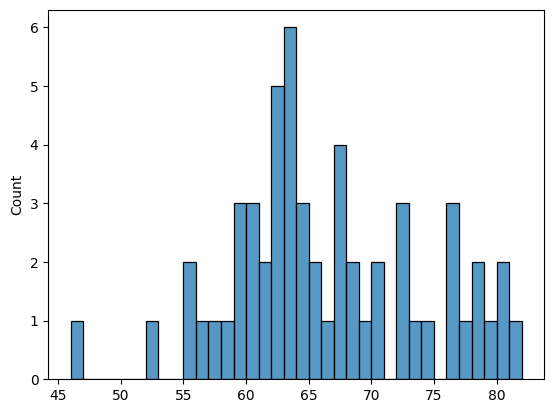

In [63]:
sns.histplot(ustrans, bins=max(ustrans)-min(ustrans))

**6. 💀 Сложное задание! 💀**

**К вам пришёл коллега с немного обновленными данными. Постройте сводную таблицу user_vs_minute_pivot, где:**

* столбцы – имена пользователей
* строки – минута времени осуществления операции (minute)
* значения – число совершённых операций

**Пропущенные значения заполните нулями.**

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [27]:
df = pd.read_csv('C:/Users/Александр/pj/karpov_courses/Python/Miniprojects/Miniproject_4/transaction_data_updated.csv',
                 parse_dates=['date'])
df.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [28]:
df.dtypes

date           datetime64[ns]
name                   object
transaction            object
minute                  int64
dtype: object

In [29]:
trans_per_minute = df.groupby(['name', 'minute'], as_index=False).size()
trans_per_minute.head()

,name,minute,size
0,Ekaterina_Fedorova,0,3
1,Ekaterina_Fedorova,1,4
2,Ekaterina_Fedorova,2,1
3,Ekaterina_Fedorova,3,3
4,Ekaterina_Fedorova,4,3


In [30]:
pivot_trans_per_minute = trans_per_minute.pivot(index='minute', columns='name', values='size')
pivot_trans_per_minute.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,NaN,3.0,1.0,1.0,4.0,1.0,3.0,NaN,NaN,1.0
1,4.0,4.0,NaN,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,NaN,NaN,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,NaN,1.0,2.0,1.0,3.0,1.0
3,3.0,NaN,2.0,NaN,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,NaN,3.0,4.0,1.0,NaN
4,3.0,NaN,NaN,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,1.0


In [31]:
pivot_trans_per_minute = pivot_trans_per_minute.fillna(0)
pivot_trans_per_minute.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


In [72]:
df2 = pd.read_csv('data/transaction_data_updated.csv', parse_dates=['date'])
df2.head()

,date,name,transaction,minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,6
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


In [73]:
#user_vs_minute_pivot 
uvmp = df2.pivot_table(columns='name' , index='minute', aggfunc='count')
uvmp = uvmp.fillna(0)
uvmp

date                                      \
name   Ekaterina_Fedorova Ekaterina_Ivanova Ekaterina_Lesnova   
minute                                                          
0                     3.0               4.0               2.0   
1                     4.0               4.0               0.0   
2                     1.0               2.0               4.0   
3                     3.0               0.0               2.0   
4                     3.0               0.0               0.0   
5                     3.0               0.0               2.0   
6                     4.0               1.0               2.0   
7                     3.0               2.0               1.0   
8                     2.0               4.0               3.0   
9                     2.0               4.0               2.0   
10                    0.0               3.0               3.0   
11                    2.0               3.0               3.0   
12                    4.0               3.0               0.0   
13                    1.0               2.0               2.0   
14                    4.0               2.0               2.0   
15                    3.0               1.0               1.0   
16                    6.0               1.0               2.0   
17                    2.0               3.0               1.0   
18                    3.0               0.0               2.0   
19                    0.0               3.0               3.0   
20                    1.0               2.0               3.0   
21                    0.0               0.0               4.0   
22                    3.0               1.0               1.0   
23                    2.0               5.0               4.0   
24                    2.0               0.0               3.0   
25                    7.0               2.0               2.0   
26                    1.0               1.0               1.0   
27                    5.0               3.0               1.0   
28                    1.0               2.0               0.0   
29                    4.0               0.0               0.0   
30                    0.0               1.0               2.0   
31                    0.0               0.0               0.0   
32                    0.0               1.0               2.0   
33                    0.0               2.0               1.0   
34                    1.0               1.0               0.0   
35                    2.0               0.0               1.0   
36                    0.0               0.0               1.0   
37                    3.0               1.0               2.0   
38                    1.0               2.0               0.0   
39                    0.0               0.0               0.0   
40                    2.0               1.0               0.0   
41                    0.0               3.0               2.0   
42                    2.0               2.0               0.0   
43                    2.0               2.0               2.0   
44                    1.0               0.0               1.0   
45                    2.0               0.0               0.0   
46                    0.0               2.0               2.0   
47                    1.0               1.0               0.0   
48                    2.0               1.0               3.0   
49                    2.0               1.0               0.0   
50                    1.0               0.0               0.0   
51                    1.0               0.0               2.0   
52                    2.0               0.0               2.0   
53                    1.0               0.0               0.0   
54                    2.0               0.0               1.0   
55                    0.0               0.0               3.0   
56                    0.0               0.0               0.0   
57                    1.0               1.0               2.0   
58                    0.0               2.0             

In [70]:
df2.query('name=="Ekaterina_Fedorova" and minute==0')

,date,name,transaction,minute
927,2020-03-02 00:00:33,Ekaterina_Fedorova,cancelled,0
3991,2020-03-02 01:00:30,Ekaterina_Fedorova,cancelled,0
4154,2020-03-02 01:00:49,Ekaterina_Fedorova,successfull,0


**7. Коллега построил следующий график по сводной таблице из предыдущего шага, и сомневается, что в данных нет ошибки.**

* по оси x – минута транзакции (сколько минут прошло с начала дня)
* по оси y – число транзакций

![](https://ucarecdn.com/76242146-2d40-40d8-9a4d-2069d97da56f/-/crop/746x502/52,40/-/preview/)

**Как вы думаете, из-за чего мы видим такую картину? Произошла ошибка, или с данными всё хорошо?**

* Всё хорошо!
* Вместо минут извлекли дни, а не сколько минут прошло с начала дня
* **Извлекли минутную часть времени, а не число минут с начала дня**
* В столбец minute записали число транзакций, совершенных пользователем

In [84]:
df2.minute.describe()

count    5315.000000
mean       24.622389
std        16.649462
min         0.000000
25%        11.000000
50%        22.000000
75%        37.000000
max        59.000000
Name: minute, dtype: float64

In [103]:
df2.date.dt.hour.describe()

count    5315.000000
mean        0.313829
std         0.464091
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: date, dtype: float64

<Axes: xlabel='date', ylabel='Count'>

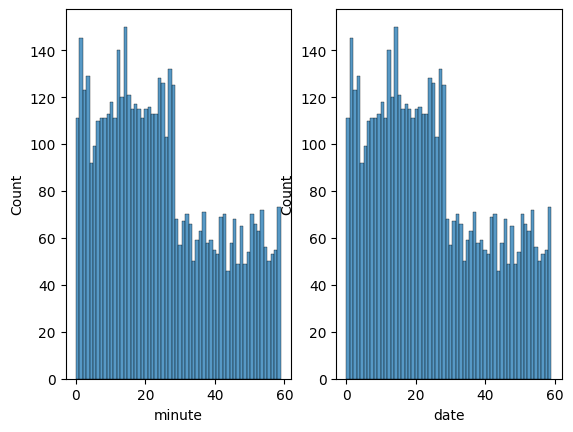

In [101]:
#mintrans = df2.groupby('minute').size()
#mintrans
fig, axs = plt.subplots(ncols=2)

sns.histplot(df2['minute'], bins=60, ax=axs[0])
sns.histplot(df2.date.dt.minute, bins=60, ax=axs[1])
#same as -   pivot + barplot

#df2.date.dt.minute.describe()
#сначала я час потерял
#ошибка в самом фрейме а не графике

In [77]:
df2.query('transaction=="successfull"').groupby('name') \
.size().describe()

count    56.000000
mean     65.928571
std       7.787769
min      46.000000
25%      61.000000
50%      64.000000
75%      72.000000
max      82.000000
dtype: float64

**8. Исправьте ошибку коллеги (если она есть 😉), и посчитайте число минут, прошедших с начала дня. Результат сохраните в колонку true_minute. Постройте график, как в предыдущем шаге, и посмотрите, произошли ли изменения (график в код включать не нужно).**

**Например:**

date    |     name    |    transaction|  minute|  true_minute
--------|------------|----------------|--------|-------------
2020-03-02| 00:37:20 |Ekaterina_Petrova | cancelled  |  37    |  37
2020-03-02| 01:06:14| Ekaterina_Smirnova |successfull | 6    |   66

Данные записаны в df , колонка date прочитана как дата.

In [104]:
df2.minute = df2.date.dt.minute + df2.date.dt.hour * 60
df2.minute.describe()

count    5315.000000
mean       43.452117
std        25.717438
min         0.000000
25%        21.000000
50%        43.000000
75%        66.000000
max        89.000000
Name: minute, dtype: float64

<Axes: xlabel='minute', ylabel='Count'>

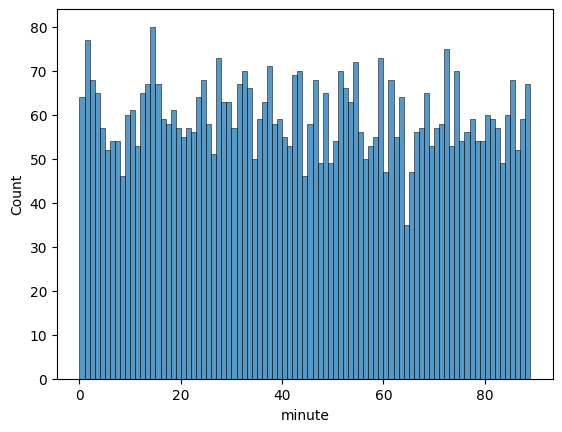

In [107]:
sns.histplot(df2['minute'], bins=89)